# 4. Train ConvNN Model: Regression Method


In the following steps, you will: 

- Load the brown dwarf dataset used to train the ML models
- Prepare the X and y variables to deploy the trained ML models
- Visualize them for few cases

We will need the following modules from `TelescopeML`:

- *DeepBuilder*: to prepare the syntheric brown dwarf dataset, load the trained machine learning (ML) models
- *Predictor*: to prepare the observatinal brown dwarf dataset and deploy the trained ML models
- *StatVisAnalyzer*: provide statistical-test and plotting function  
- *IO_utils*: provide functions to load the trained ML models

In [1]:
from TelescopeML.DataMaster import *
from TelescopeML.DeepTrainer import *
from TelescopeML.Predictor import *
from TelescopeML.IO_utils import load_or_dump_trained_model_CNN
from TelescopeML.StatVisAnalyzer import *

No Bottleneck unit testing available.


Loading BokehJS ...

Loading BokehJS ...

Loading BokehJS ...

## 3.1 Data Preperation 

### 3.1.1 Load the Synthetic spectra - training dataset

We computed a low-resolution spectrum ($R$=200) utilizing atmopshric brown dwarfs grid model, [*Sonora-Bobcat*](https://arxiv.org/pdf/2107.07434.pdf) for spectral range $\sim$0.9-2.4 $\mu m$. An open-source atmospheric radiative transfer Python package, [*PICASO*](https://natashabatalha.github.io/picaso/) was employed for generating these datasets. This dataset encompass 30,888 synthetic spectra (or instances or rows). 

Each spectrum has 104 features (or wavelengths in the astrophysics context, i.e., 0.897, 0.906, ..., 2.512~$\mu$m) and 4 parameters:
- gravity ( log$g$ ) 
- temperature ( T$_{eff}$ )
- carbon-to-oxygen ratio ( C/O )
- metallicity ( [M/H] )

In [2]:
# Read the `TelescopeML_reference_data` path

import os  # to check the path  

__reference_data_path__ = os.getenv("TelescopeML_reference_data")
__reference_data_path__

'/Users/egharibn/RESEARCH/ml/projects/TelescopeML_project/reference_data/'

 Load the dataset and check few instances 

In [3]:
train_BD = pd.read_csv(os.path.join(__reference_data_path__, 
                                    'training_datasets', 
                                    'browndwarf_R100_v4_newWL_v2.csv.bz2'), compression='bz2')
train_BD.head(5)

,gravity,temperature,c_o_ratio,metallicity,2.512,2.487,2.462,2.438,2.413,2.389,...,0.971,0.962,0.952,0.943,0.933,0.924,0.915,0.906,0.897,is_augmented
0,5.0,1100,0.25,-1.0,9.103045e-08,1.181658e-07,1.307868e-07,1.269229e-07,1.159179e-07,8.925110e-08,...,9.640859e-08,7.612550e-08,6.901364e-08,6.247359e-08,4.112384e-08,5.127995e-08,4.897355e-08,4.087795e-08,2.791689e-08,no
1,5.0,1100,0.25,-0.7,9.103045e-08,1.181658e-07,1.307868e-07,1.269229e-07,1.159179e-07,8.925110e-08,...,9.640859e-08,7.612550e-08,6.901364e-08,6.247359e-08,4.112384e-08,5.127995e-08,4.897355e-08,4.087795e-08,2.791689e-08,no
2,5.0,1100,0.25,-0.5,9.103045e-08,1.181658e-07,1.307868e-07,1.269229e-07,1.159179e-07,8.925110e-08,...,9.640859e-08,7.612550e-08,6.901364e-08,6.247359e-08,4.112384e-08,5.127995e-08,4.897355e-08,4.087795e-08,2.791689e-08,no
3,5.0,1100,0.25,-0.3,9.103045e-08,1.181658e-07,1.307868e-07,1.269229e-07,1.159179e-07,8.925110e-08,...,9.640859e-08,7.612550e-08,6.901364e-08,6.247359e-08,4.112384e-08,5.127995e-08,4.897355e-08,4.087795e-08,2.791689e-08,no
4,5.0,1100,0.25,0.0,9.103045e-08,1.181658e-07,1.307868e-07,1.269229e-07,1.159179e-07,8.925110e-08,...,9.640859e-08,7.612550e-08,6.901364e-08,6.247359e-08,4.112384e-08,5.127995e-08,4.897355e-08,4.087795e-08,2.791689e-08,no


### 3.1.2 Check atmospheric parameters

- gravity ( log$g$ ) 
- temperature ( T$_{eff}$ )
- carbon-to-oxygen ratio ( C/O )
- metallicity ( [M/H] )

Note: one of the columns, *is_augmented*, is indicating whether this is a native dataset or an augmented one. let's just ignore it for now!

In [4]:
target_features = ['gravity', 'temperature', 'c_o_ratio', 'metallicity']
train_BD[target_features].head()

,gravity,temperature,c_o_ratio,metallicity
0,5.0,1100,0.25,-1.0
1,5.0,1100,0.25,-0.7
2,5.0,1100,0.25,-0.5
3,5.0,1100,0.25,-0.3
4,5.0,1100,0.25,0.0


In [5]:
# training_features_labels: they are Wavelengths variables in string format

training_features_labels = [item for item in train_BD.columns.to_list() if item not in target_features+['is_augmented']]
training_features_labels[:5]

['2.512', '2.487', '2.462', '2.438', '2.413']

In [6]:
# training_features_wl: they are Wavelengths variables 

training_features_wl = [float(item) for item in train_BD.columns.to_list() if item not in target_features+['is_augmented']]
training_features_wl[:5]

[2.512, 2.487, 2.462, 2.438, 2.413]

In [7]:
wl_synthetic = pd.read_csv(os.path.join(__reference_data_path__, 
                                        'training_datasets', 
                                        'wl.csv'))
wl_synthetic.head(3)

,wl
0,2.511960
1,2.486966
2,2.462220


### 3.1.3 Prepare Inputs and outputs for ML models (X,y)
- X: 104 column variables or fluxes
- y: output variables: 'gravity', 'temperature',  'c_o_ratio', 'metallicity'

Note: one of the columns, *is_augmented*, is indicating whether this is a native dataset or an augmented one. let's just ignore it for now!


In [8]:
# to assure we are only training the module with the native non-augmented BD training dataset
train_BD = train_BD[train_BD['is_augmented'].isin(['no'])] 


# Training feature variables
X = train_BD.drop(
    columns=['gravity', 
             'temperature', 
             'c_o_ratio', 
             'metallicity', 
             'is_augmented'])#.astype(np.float32)


# Target/Output feature variables
y = train_BD[['gravity', 'c_o_ratio', 'metallicity', 'temperature', ]]#.astype(np.float32)


log-transform the 'temperature' variable toreduce the skewness of the data, making it more symmetric and normal-like for the ML model


In [9]:
y.loc[:, 'temperature'] = np.log10(y['temperature'])

In [10]:
# check the output variables
y.head()

,gravity,c_o_ratio,metallicity,temperature
0,5.0,0.25,-1.0,3.041393
1,5.0,0.25,-0.7,3.041393
2,5.0,0.25,-0.5,3.041393
3,5.0,0.25,-0.3,3.041393
4,5.0,0.25,0.0,3.041393


---

## 3.2 Build the CNN model and Processing the Data

Here we instintiate BuildRegressorCNN class from DeepBuilder module to prepare the datasets and take the trained CNN (Convolutional Neural Networks) for us:

- Take the synthetic datasets
- Process them, e.g.
    - Divide them to three sets: train, validation, and test sets
    - Scale y variables
    - Scale X variables
    - Create new features 
    

### 3.2.1 Instintiate BuildRegressorCNN class from DeepBuilder module

In [11]:
trained_Data_Processor = DataProcessor( 
                             feature_values=X.to_numpy(),
                             feature_names=X.columns,
                             target_values=y.to_numpy(),
                             target_name=['gravity', 'c_o_ratio', 'metallicity', 'temperature'],
                             is_tuned='yes',
                             param_grid=None,
                             spectral_resolution=100,
                             is_feature_improved='no',
                             is_augmented='no',
                             ml_model=None,
                             ml_model_str='CNN',
                                )

### 3.2.2 Split the dataset into train, validate and test sets

In [12]:
trained_Data_Processor.split_train_validation_test(test_size=0.1, 
                                                 val_size=0.1, 
                                                 random_state_=100,)

### 3.2.3 Standardize X Variables Row-wise 

In [13]:
# Scale the X features using MinMax Scaler
trained_Data_Processor.standardize_X_row_wise()

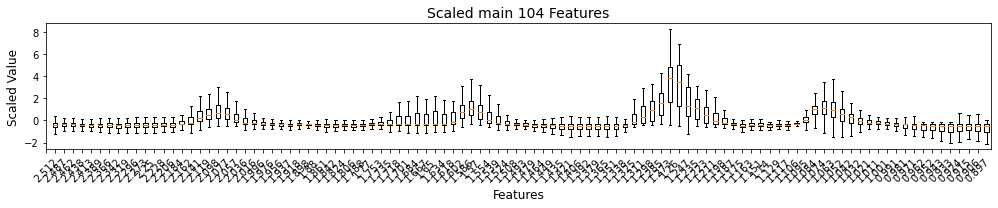

In [14]:
trained_Data_Processor.plot_boxplot_scaled_features(scaled_feature= trained_Data_Processor.X_train_standardized_rowwise, 
                                                  xticks_list = training_features_labels,
                                                  title = 'Scaled main 104 Features',
                                                  fig_size=(14, 3),
                                                    )

### 3.2.4 Standardize y Variables Column-wise 

In [15]:
# Standardize the y features using Standard Scaler
trained_Data_Processor.standardize_y_column_wise()

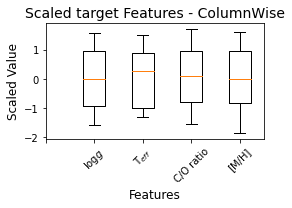

In [16]:
trained_Data_Processor.plot_boxplot_scaled_features(scaled_feature= trained_Data_Processor.y_train_standardized_columnwise, 
                                                  xticks_list = ['','$\log g$', 'T$_{eff}$', 'C/O ratio', '[M/H]'],
                                                  title = 'Scaled target Features - ColumnWise',
                                                  fig_size=(4, 3),
                                                    )

### 3.2.5 Feature engeenering: Take Min and Max of each row (BD spectra) 

In [17]:
# train
trained_Data_Processor.X_train_min = trained_Data_Processor.X_train.min(axis=1)
trained_Data_Processor.X_train_max = trained_Data_Processor.X_train.max(axis=1)

# validation
trained_Data_Processor.X_val_min = trained_Data_Processor.X_val.min(axis=1)
trained_Data_Processor.X_val_max = trained_Data_Processor.X_val.max(axis=1)

# test
trained_Data_Processor.X_test_min = trained_Data_Processor.X_test.min(axis=1)
trained_Data_Processor.X_test_max = trained_Data_Processor.X_test.max(axis=1)

In [18]:
df_MinMax_train = pd.DataFrame((trained_Data_Processor.X_train_min, trained_Data_Processor.X_train_max)).T
df_MinMax_val = pd.DataFrame((trained_Data_Processor.X_val_min, trained_Data_Processor.X_val_max)).T
df_MinMax_test = pd.DataFrame((trained_Data_Processor.X_test_min, trained_Data_Processor.X_test_max)).T

In [19]:
df_MinMax_train.rename(columns={0:'min', 1:'max'}, inplace=True)

In [20]:
df_MinMax_train.head()

,min,max
0,2.984493e-18,4.560593e-11
1,6.833671e-15,2.317328e-09
2,2.870361e-14,5.564836e-09
3,5.696652e-19,5.071436e-11
4,1.321553e-10,1.636513e-07


### 3.2.6 Scale Min Max features - ColumnWise

In [21]:
trained_Data_Processor.standardize_X_column_wise(
                                                X_train = df_MinMax_train.to_numpy(),
                                                X_val   = df_MinMax_val.to_numpy(),
                                                X_test  = df_MinMax_test.to_numpy(),
                                                )

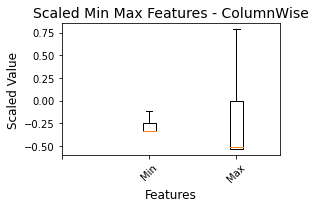

In [22]:
trained_Data_Processor.plot_boxplot_scaled_features(scaled_feature= trained_Data_Processor.X_test_standardized_columnwise, 
                                                  xticks_list = ['','Min','Max'],
                                                  title = 'Scaled Min Max Features - ColumnWise',
                                                  fig_size=(4, 3),
                                                    )

## 3.3 Train CNN model

### 3.3.1 Instintiate *TrainRegressorCNN* class from *DeepTrainer* Module

In [23]:
train_cnn_model = TrainRegressorCNN(
            # input dataset: StandardScaled instances  
            X1_train = trained_Data_Processor.X_train_standardized_rowwise,
            X1_val   = trained_Data_Processor.X_val_standardized_rowwise,
            X1_test  = trained_Data_Processor.X_test_standardized_rowwise,

            # input dataset: Min Max of each instance  
            X2_train = trained_Data_Processor.X_train_standardized_columnwise,
            X2_val   = trained_Data_Processor.X_val_standardized_columnwise,
            X2_test  = trained_Data_Processor.X_test_standardized_columnwise,
#             X2_train = trained_Data_Processor.X_train_normalized_columnwise,
#             X2_val   = trained_Data_Processor.X_val_normalized_columnwise,
#             X2_test  = trained_Data_Processor.X_test_normalized_columnwise,

            # 1st target
            y1_train = trained_Data_Processor.y_train_standardized_columnwise[:,0],
            y1_val   = trained_Data_Processor.y_val_standardized_columnwise[:,0],
            y1_test  = trained_Data_Processor.y_test_standardized_columnwise[:,0],

            # 2nd target
            y2_train = trained_Data_Processor.y_train_standardized_columnwise[:,1],
            y2_val   = trained_Data_Processor.y_val_standardized_columnwise[:,1],
            y2_test  = trained_Data_Processor.y_test_standardized_columnwise[:,1],

            # 3rd target
            y3_train = trained_Data_Processor.y_train_standardized_columnwise[:,2],
            y3_val   = trained_Data_Processor.y_val_standardized_columnwise[:,2],
            y3_test  = trained_Data_Processor.y_test_standardized_columnwise[:,2],

            # 4th target
            y4_train = trained_Data_Processor.y_train_standardized_columnwise[:,3],
            y4_val   = trained_Data_Processor.y_val_standardized_columnwise[:,3],
            y4_test  = trained_Data_Processor.y_test_standardized_columnwise[:,3],
            )

### 3.3.2 Define the Hyperparameters

In [24]:
hyperparameters = {'Conv__MaxPooling1D': 2,
                 'Conv__num_blocks': 1,
                 'Conv__num_layers_per_block': 3,
                 'Conv__num_filters': 4,
                 'Conv__kernel_size': 6,
                   
                 'FC2__num_blocks': 4,
                 'FC2_num_layers_per_block': 2,
                 'FC__dropout': 0.0024609140719442646,
                 'FC2__dropout': 64,
                 'FC2__units': 64,
#                  'FC__units_gravity': 16,
#                  'FC__units_metallicity': 256,
#                  'FC__units_temperature': 8,
                   
                 'FC1__num_blocks': 1,
                 'FC1_num_layers_per_block': 4,
                 'FC2__dropout': 0.09889223768186726,
                 'FC1__units': 128,
                 'FC1__dropout': 0.002185843015008406,
                   
                 'learning_rate': 4.9946842008422193e-05}

In [25]:
# hyperparameters = {
#      'Conv__MaxPooling1D': 2,
#      'Conv__num_blocks': 1,
#      'Conv__num_layers_per_block': 3,
#      'Conv__num_filters': 4,
#      'Conv__kernel_size': 6,
#      'FC__NumberLayers': 4,
    
#      'FC1__num_blocks' : 1,
#      'FC1_num_layers_per_block': 2,
#      'FC1__dropout': 0.09889223768186726,
#      'FC1__units': 128,

#      'FC2__num_blocks' : 1,
#      'FC2_num_layers_per_block':2,
#      'FC2__dropout': 0.0024609140719442646,
#      'FC2__units': 64,

    
#      'learning_rate': 4.9946842008422193e-05}

### 3.3.3 Build a CNN model

In [26]:
train_cnn_model.build_model(hyperparameters = hyperparameters, 
                     )

Model: "model"


__________________________________________________________________________________________________


 Layer (type)                Output Shape                 Param #   Connected to                  


 input_1 (InputLayer)        [(None, 104, 1)]             0         []                            


 Conv__B1_L1 (Conv1D)        (None, 104, 16)              112       ['input_1[0][0]']             


 Conv__B1_L2 (Conv1D)        (None, 104, 64)              6208      ['Conv__B1_L1[0][0]']         


 Conv__B1_L3 (Conv1D)        (None, 104, 144)             55440     ['Conv__B1_L2[0][0]']         


 MaxPool1D__B1_L3 (MaxPooli  (None, 52, 144)              0         ['Conv__B1_L3[0][0]']         


 ng1D)                                                                                            


 flatten (Flatten)           (None, 7488)                 0         ['MaxPool1D__B1_L3[0][0]']    


 FC1__B1_L1 (Dense)          (None, 512)                  3834368   ['flatten[0][0]']             


 FC1__B1_L2 (Dense)          (None, 2048)                 1050624   ['FC1__B1_L1[0][0]']          


 FC1__B1_L3 (Dense)          (None, 4608)                 9441792   ['FC1__B1_L2[0][0]']          


 FC1__B1_L4 (Dense)          (None, 8192)                 3775692   ['FC1__B1_L3[0][0]']          


                                                          8                                       


 FC1__Dropout__B1_L4 (Dropo  (None, 8192)                 0         ['FC1__B1_L4[0][0]']          


 ut)                                                                                              


 input_2 (InputLayer)        [(None, 2)]                  0         []                            


 Concatenated_Layer (Concat  (None, 8194)                 0         ['FC1__Dropout__B1_L4[0][0]', 


 enate)                                                              'input_2[0][0]']             


 FC2__B1_L1 (Dense)          (None, 256)                  2097920   ['Concatenated_Layer[0][0]']  


 FC2__B1_L2 (Dense)          (None, 1024)                 263168    ['FC2__B1_L1[0][0]']          


 FC2__Dropout__B1_L2 (Dropo  (None, 1024)                 0         ['FC2__B1_L2[0][0]']          


 ut)                                                                                              


 FC2__B2_L1 (Dense)          (None, 1024)                 1049600   ['FC2__Dropout__B1_L2[0][0]'] 


 FC2__B2_L2 (Dense)          (None, 2304)                 2361600   ['FC2__B2_L1[0][0]']          


 FC2__Dropout__B2_L2 (Dropo  (None, 2304)                 0         ['FC2__B2_L2[0][0]']          


 ut)                                                                                              


 FC2__B3_L1 (Dense)          (None, 2304)                 5310720   ['FC2__Dropout__B2_L2[0][0]'] 


 FC2__B3_L2 (Dense)          (None, 4096)                 9441280   ['FC2__B3_L1[0][0]']          


 FC2__Dropout__B3_L2 (Dropo  (None, 4096)                 0         ['FC2__B3_L2[0][0]']          


 ut)                                                                                              


 FC2__B4_L1 (Dense)          (None, 4096)                 1678131   ['FC2__Dropout__B3_L2[0][0]'] 


                                                          2                                       


 FC2__B4_L2 (Dense)          (None, 6400)                 2622080   ['FC2__B4_L1[0][0]']          


                                                          0                                       


 FC2__Dropout__B4_L2 (Dropo  (None, 6400)                 0         ['FC2__B4_L2[0][0]']          


 ut)                                                                                              


 gravity (Dense)             (None, 1)                    6401      ['FC2__Dropout__B4_L2[0][0]'] 


 c_o_ratio (Dense)           (None, 1)                    6401      ['FC2__Dropout__B4_L2[0][0]'] 


 metallicity (Dense)         (None, 1)                    6401      ['FC2__Dropout__B4_L2[0][0]'] 


 temperature (Dense)         (None, 1)                    6401      ['FC2__Dropout__B4_L2[0][0]'] 


Total params: 115697476 (441.35 MB)


Trainable params: 115697476 (441.35 MB)


Non-trainable params: 0 (0.00 Byte)


__________________________________________________________________________________________________


None


### 3.3.4 Train the CNN model using the datasets

In [27]:
history, model =  train_cnn_model.fit_cnn_model(batch_size=2**11,
                                                budget=4)

Epoch 1/4


 1/13 [=>............................] - ETA: 1:23 - loss: 1.8614 - gravity_loss: 0.4751 - c_o_ratio_loss: 0.4675 - metallicity_loss: 0.4609 - temperature_loss: 0.4579 - gravity_mae: 0.8787 - c_o_ratio_mae: 0.8872 - metallicity_mae: 0.8549 - temperature_mae: 0.8600

 2/13 [===>..........................] - ETA: 39s - loss: 1.8394 - gravity_loss: 0.4694 - c_o_ratio_loss: 0.4731 - metallicity_loss: 0.4538 - temperature_loss: 0.4432 - gravity_mae: 0.8725 - c_o_ratio_mae: 0.8945 - metallicity_mae: 0.8462 - temperature_mae: 0.8401 

 3/13 [=====>........................] - ETA: 36s - loss: 1.8315 - gravity_loss: 0.4644 - c_o_ratio_loss: 0.4715 - metallicity_loss: 0.4535 - temperature_loss: 0.4421 - gravity_mae: 0.8663 - c_o_ratio_mae: 0.8919 - metallicity_mae: 0.8461 - temperature_mae: 0.8400

 4/13 [========>.....................] - ETA: 33s - loss: 1.8021 - gravity_loss: 0.4614 - c_o_ratio_loss: 0.4652 - metallicity_loss: 0.4495 - temperature_loss: 0.4260 - gravity_mae: 0.8621 - c_o_ratio_mae: 0.8847 - metallicity_mae: 0.8435 - temperature_mae: 0.8213

 5/13 [==========>...................] - ETA: 30s - loss: 1.7543 - gravity_loss: 0.4614 - c_o_ratio_loss: 0.4611 - metallicity_loss: 0.4377 - temperature_loss: 0.3941 - gravity_mae: 0.8635 - c_o_ratio_mae: 0.8799 - metallicity_mae: 0.8304 - temperature_mae: 0.7791

 6/13 [============>.................] - ETA: 27s - loss: 1.6849 - gravity_loss: 0.4570 - c_o_ratio_loss: 0.4564 - metallicity_loss: 0.4236 - temperature_loss: 0.3480 - gravity_mae: 0.8588 - c_o_ratio_mae: 0.8733 - metallicity_mae: 0.8136 - temperature_mae: 0.7129

 7/13 [===============>..............] - ETA: 24s - loss: 1.6192 - gravity_loss: 0.4513 - c_o_ratio_loss: 0.4525 - metallicity_loss: 0.4044 - temperature_loss: 0.3110 - gravity_mae: 0.8524 - c_o_ratio_mae: 0.8678 - metallicity_mae: 0.7891 - temperature_mae: 0.6611

 8/13 [=================>............] - ETA: 20s - loss: 1.6241 - gravity_loss: 0.4470 - c_o_ratio_loss: 0.4458 - metallicity_loss: 0.3879 - temperature_loss: 0.3435 - gravity_mae: 0.8470 - c_o_ratio_mae: 0.8590 - metallicity_mae: 0.7674 - temperature_mae: 0.7082

 9/13 [===================>..........] - ETA: 16s - loss: 1.5797 - gravity_loss: 0.4392 - c_o_ratio_loss: 0.4416 - metallicity_loss: 0.3715 - temperature_loss: 0.3273 - gravity_mae: 0.8373 - c_o_ratio_mae: 0.8531 - metallicity_mae: 0.7455 - temperature_mae: 0.6891

10/13 [======================>.......] - ETA: 11s - loss: 1.5481 - gravity_loss: 0.4339 - c_o_ratio_loss: 0.4371 - metallicity_loss: 0.3614 - temperature_loss: 0.3158 - gravity_mae: 0.8306 - c_o_ratio_mae: 0.8469 - metallicity_mae: 0.7322 - temperature_mae: 0.6798

11/13 [========================>.....] - ETA: 7s - loss: 1.5033 - gravity_loss: 0.4286 - c_o_ratio_loss: 0.4338 - metallicity_loss: 0.3477 - temperature_loss: 0.2932 - gravity_mae: 0.8241 - c_o_ratio_mae: 0.8428 - metallicity_mae: 0.7137 - temperature_mae: 0.6436 

12/13 [==========================>...] - ETA: 3s - loss: 1.4687 - gravity_loss: 0.4248 - c_o_ratio_loss: 0.4287 - metallicity_loss: 0.3377 - temperature_loss: 0.2775 - gravity_mae: 0.8200 - c_o_ratio_mae: 0.8364 - metallicity_mae: 0.7006 - temperature_mae: 0.6222

13/13 [==============================] - ETA: 0s - loss: 1.4625 - gravity_loss: 0.4241 - c_o_ratio_loss: 0.4270 - metallicity_loss: 0.3362 - temperature_loss: 0.2752 - gravity_mae: 0.8189 - c_o_ratio_mae: 0.8344 - metallicity_mae: 0.6988 - temperature_mae: 0.6194

13/13 [==============================] - 55s 4s/step - loss: 1.4625 - gravity_loss: 0.4241 - c_o_ratio_loss: 0.4270 - metallicity_loss: 0.3362 - temperature_loss: 0.2752 - gravity_mae: 0.8189 - c_o_ratio_mae: 0.8344 - metallicity_mae: 0.6988 - temperature_mae: 0.6194 - val_loss: 1.0445 - val_gravity_loss: 0.3688 - val_c_o_ratio_loss: 0.3357 - val_metallicity_loss: 0.2065 - val_temperature_loss: 0.1336 - val_gravity_mae: 0.7497 - val_c_o_ratio_mae: 0.7166 - val_metallicity_mae: 0.5223 - val_temperature_mae: 0.4412


Epoch 2/4


 1/13 [=>............................] - ETA: 49s - loss: 1.1122 - gravity_loss: 0.3799 - c_o_ratio_loss: 0.3665 - metallicity_loss: 0.2097 - temperature_loss: 0.1561 - gravity_mae: 0.7627 - c_o_ratio_mae: 0.7580 - metallicity_mae: 0.5354 - temperature_mae: 0.4806

 2/13 [===>..........................] - ETA: 45s - loss: 1.0654 - gravity_loss: 0.3747 - c_o_ratio_loss: 0.3505 - metallicity_loss: 0.2041 - temperature_loss: 0.1361 - gravity_mae: 0.7583 - c_o_ratio_mae: 0.7356 - metallicity_mae: 0.5250 - temperature_mae: 0.4425

 3/13 [=====>........................] - ETA: 43s - loss: 1.0290 - gravity_loss: 0.3742 - c_o_ratio_loss: 0.3357 - metallicity_loss: 0.2010 - temperature_loss: 0.1181 - gravity_mae: 0.7560 - c_o_ratio_mae: 0.7135 - metallicity_mae: 0.5210 - temperature_mae: 0.4044

 4/13 [========>.....................] - ETA: 40s - loss: 0.9952 - gravity_loss: 0.3677 - c_o_ratio_loss: 0.3214 - metallicity_loss: 0.2004 - temperature_loss: 0.1057 - gravity_mae: 0.7486 - c_o_ratio_mae: 0.6919 - metallicity_mae: 0.5203 - temperature_mae: 0.3766

 5/13 [==========>...................] - ETA: 35s - loss: 0.9667 - gravity_loss: 0.3632 - c_o_ratio_loss: 0.3092 - metallicity_loss: 0.1990 - temperature_loss: 0.0953 - gravity_mae: 0.7423 - c_o_ratio_mae: 0.6748 - metallicity_mae: 0.5179 - temperature_mae: 0.3537

 6/13 [============>.................] - ETA: 30s - loss: 0.9511 - gravity_loss: 0.3603 - c_o_ratio_loss: 0.3037 - metallicity_loss: 0.1991 - temperature_loss: 0.0880 - gravity_mae: 0.7373 - c_o_ratio_mae: 0.6679 - metallicity_mae: 0.5178 - temperature_mae: 0.3378

 7/13 [===============>..............] - ETA: 25s - loss: 0.9339 - gravity_loss: 0.3573 - c_o_ratio_loss: 0.2962 - metallicity_loss: 0.1971 - temperature_loss: 0.0833 - gravity_mae: 0.7328 - c_o_ratio_mae: 0.6556 - metallicity_mae: 0.5147 - temperature_mae: 0.3279

 8/13 [=================>............] - ETA: 21s - loss: 0.9169 - gravity_loss: 0.3529 - c_o_ratio_loss: 0.2899 - metallicity_loss: 0.1949 - temperature_loss: 0.0793 - gravity_mae: 0.7262 - c_o_ratio_mae: 0.6458 - metallicity_mae: 0.5109 - temperature_mae: 0.3196

 9/13 [===================>..........] - ETA: 17s - loss: 0.9073 - gravity_loss: 0.3509 - c_o_ratio_loss: 0.2827 - metallicity_loss: 0.1952 - temperature_loss: 0.0785 - gravity_mae: 0.7233 - c_o_ratio_mae: 0.6359 - metallicity_mae: 0.5111 - temperature_mae: 0.3183

10/13 [======================>.......] - ETA: 12s - loss: 0.8950 - gravity_loss: 0.3491 - c_o_ratio_loss: 0.2748 - metallicity_loss: 0.1959 - temperature_loss: 0.0752 - gravity_mae: 0.7208 - c_o_ratio_mae: 0.6236 - metallicity_mae: 0.5123 - temperature_mae: 0.3108

11/13 [========================>.....] - ETA: 8s - loss: 0.8813 - gravity_loss: 0.3466 - c_o_ratio_loss: 0.2690 - metallicity_loss: 0.1943 - temperature_loss: 0.0714 - gravity_mae: 0.7176 - c_o_ratio_mae: 0.6148 - metallicity_mae: 0.5097 - temperature_mae: 0.3010 

12/13 [==========================>...] - ETA: 4s - loss: 0.8703 - gravity_loss: 0.3456 - c_o_ratio_loss: 0.2625 - metallicity_loss: 0.1946 - temperature_loss: 0.0676 - gravity_mae: 0.7167 - c_o_ratio_mae: 0.6056 - metallicity_mae: 0.5098 - temperature_mae: 0.2909

13/13 [==============================] - ETA: 0s - loss: 0.8675 - gravity_loss: 0.3452 - c_o_ratio_loss: 0.2607 - metallicity_loss: 0.1946 - temperature_loss: 0.0670 - gravity_mae: 0.7163 - c_o_ratio_mae: 0.6032 - metallicity_mae: 0.5098 - temperature_mae: 0.2895

13/13 [==============================] - 53s 4s/step - loss: 0.8675 - gravity_loss: 0.3452 - c_o_ratio_loss: 0.2607 - metallicity_loss: 0.1946 - temperature_loss: 0.0670 - gravity_mae: 0.7163 - c_o_ratio_mae: 0.6032 - metallicity_mae: 0.5098 - temperature_mae: 0.2895 - val_loss: 0.6753 - val_gravity_loss: 0.3188 - val_c_o_ratio_loss: 0.1573 - val_metallicity_loss: 0.1651 - val_temperature_loss: 0.0342 - val_gravity_mae: 0.6809 - val_c_o_ratio_mae: 0.4381 - val_metallicity_mae: 0.4685 - val_temperature_mae: 0.2107


Epoch 3/4


 1/13 [=>............................] - ETA: 49s - loss: 0.7108 - gravity_loss: 0.3224 - c_o_ratio_loss: 0.1786 - metallicity_loss: 0.1707 - temperature_loss: 0.0390 - gravity_mae: 0.6847 - c_o_ratio_mae: 0.4804 - metallicity_mae: 0.4776 - temperature_mae: 0.2218

 2/13 [===>..........................] - ETA: 41s - loss: 0.7031 - gravity_loss: 0.3255 - c_o_ratio_loss: 0.1654 - metallicity_loss: 0.1776 - temperature_loss: 0.0346 - gravity_mae: 0.6867 - c_o_ratio_mae: 0.4597 - metallicity_mae: 0.4839 - temperature_mae: 0.2066

 3/13 [=====>........................] - ETA: 38s - loss: 0.6846 - gravity_loss: 0.3177 - c_o_ratio_loss: 0.1591 - metallicity_loss: 0.1753 - temperature_loss: 0.0325 - gravity_mae: 0.6766 - c_o_ratio_mae: 0.4505 - metallicity_mae: 0.4796 - temperature_mae: 0.1999

 4/13 [========>.....................] - ETA: 34s - loss: 0.6834 - gravity_loss: 0.3205 - c_o_ratio_loss: 0.1555 - metallicity_loss: 0.1761 - temperature_loss: 0.0312 - gravity_mae: 0.6803 - c_o_ratio_mae: 0.4436 - metallicity_mae: 0.4820 - temperature_mae: 0.1956

 5/13 [==========>...................] - ETA: 30s - loss: 0.6742 - gravity_loss: 0.3181 - c_o_ratio_loss: 0.1526 - metallicity_loss: 0.1733 - temperature_loss: 0.0302 - gravity_mae: 0.6761 - c_o_ratio_mae: 0.4378 - metallicity_mae: 0.4775 - temperature_mae: 0.1926

 6/13 [============>.................] - ETA: 26s - loss: 0.6707 - gravity_loss: 0.3187 - c_o_ratio_loss: 0.1505 - metallicity_loss: 0.1718 - temperature_loss: 0.0296 - gravity_mae: 0.6757 - c_o_ratio_mae: 0.4330 - metallicity_mae: 0.4751 - temperature_mae: 0.1911

 7/13 [===============>..............] - ETA: 22s - loss: 0.6630 - gravity_loss: 0.3160 - c_o_ratio_loss: 0.1474 - metallicity_loss: 0.1713 - temperature_loss: 0.0283 - gravity_mae: 0.6720 - c_o_ratio_mae: 0.4273 - metallicity_mae: 0.4746 - temperature_mae: 0.1866

 8/13 [=================>............] - ETA: 19s - loss: 0.6589 - gravity_loss: 0.3162 - c_o_ratio_loss: 0.1455 - metallicity_loss: 0.1701 - temperature_loss: 0.0272 - gravity_mae: 0.6721 - c_o_ratio_mae: 0.4230 - metallicity_mae: 0.4729 - temperature_mae: 0.1824

 9/13 [===================>..........] - ETA: 15s - loss: 0.6552 - gravity_loss: 0.3165 - c_o_ratio_loss: 0.1431 - metallicity_loss: 0.1692 - temperature_loss: 0.0264 - gravity_mae: 0.6731 - c_o_ratio_mae: 0.4197 - metallicity_mae: 0.4715 - temperature_mae: 0.1793

10/13 [======================>.......] - ETA: 11s - loss: 0.6500 - gravity_loss: 0.3156 - c_o_ratio_loss: 0.1392 - metallicity_loss: 0.1695 - temperature_loss: 0.0256 - gravity_mae: 0.6723 - c_o_ratio_mae: 0.4130 - metallicity_mae: 0.4715 - temperature_mae: 0.1768

11/13 [========================>.....] - ETA: 7s - loss: 0.6441 - gravity_loss: 0.3149 - c_o_ratio_loss: 0.1357 - metallicity_loss: 0.1683 - temperature_loss: 0.0252 - gravity_mae: 0.6720 - c_o_ratio_mae: 0.4074 - metallicity_mae: 0.4699 - temperature_mae: 0.1752 

12/13 [==========================>...] - ETA: 3s - loss: 0.6390 - gravity_loss: 0.3138 - c_o_ratio_loss: 0.1331 - metallicity_loss: 0.1673 - temperature_loss: 0.0247 - gravity_mae: 0.6711 - c_o_ratio_mae: 0.4041 - metallicity_mae: 0.4687 - temperature_mae: 0.1730

13/13 [==============================] - ETA: 0s - loss: 0.6382 - gravity_loss: 0.3135 - c_o_ratio_loss: 0.1328 - metallicity_loss: 0.1674 - temperature_loss: 0.0246 - gravity_mae: 0.6707 - c_o_ratio_mae: 0.4034 - metallicity_mae: 0.4688 - temperature_mae: 0.1727

13/13 [==============================] - 50s 4s/step - loss: 0.6382 - gravity_loss: 0.3135 - c_o_ratio_loss: 0.1328 - metallicity_loss: 0.1674 - temperature_loss: 0.0246 - gravity_mae: 0.6707 - c_o_ratio_mae: 0.4034 - metallicity_mae: 0.4688 - temperature_mae: 0.1727 - val_loss: 0.5380 - val_gravity_loss: 0.2826 - val_c_o_ratio_loss: 0.0859 - val_metallicity_loss: 0.1540 - val_temperature_loss: 0.0156 - val_gravity_mae: 0.6271 - val_c_o_ratio_mae: 0.3216 - val_metallicity_mae: 0.4491 - val_temperature_mae: 0.1379


Epoch 4/4


 1/13 [=>............................] - ETA: 45s - loss: 0.5750 - gravity_loss: 0.2953 - c_o_ratio_loss: 0.1010 - metallicity_loss: 0.1616 - temperature_loss: 0.0171 - gravity_mae: 0.6441 - c_o_ratio_mae: 0.3488 - metallicity_mae: 0.4634 - temperature_mae: 0.1433

 2/13 [===>..........................] - ETA: 44s - loss: 0.5676 - gravity_loss: 0.2911 - c_o_ratio_loss: 0.0988 - metallicity_loss: 0.1606 - temperature_loss: 0.0170 - gravity_mae: 0.6397 - c_o_ratio_mae: 0.3486 - metallicity_mae: 0.4629 - temperature_mae: 0.1426

 3/13 [=====>........................] - ETA: 39s - loss: 0.5658 - gravity_loss: 0.2898 - c_o_ratio_loss: 0.1008 - metallicity_loss: 0.1580 - temperature_loss: 0.0172 - gravity_mae: 0.6391 - c_o_ratio_mae: 0.3504 - metallicity_mae: 0.4594 - temperature_mae: 0.1431

 4/13 [========>.....................] - ETA: 35s - loss: 0.5615 - gravity_loss: 0.2884 - c_o_ratio_loss: 0.0984 - metallicity_loss: 0.1579 - temperature_loss: 0.0168 - gravity_mae: 0.6364 - c_o_ratio_mae: 0.3467 - metallicity_mae: 0.4579 - temperature_mae: 0.1417

 5/13 [==========>...................] - ETA: 31s - loss: 0.5558 - gravity_loss: 0.2854 - c_o_ratio_loss: 0.0979 - metallicity_loss: 0.1562 - temperature_loss: 0.0163 - gravity_mae: 0.6330 - c_o_ratio_mae: 0.3476 - metallicity_mae: 0.4547 - temperature_mae: 0.1394

 6/13 [============>.................] - ETA: 27s - loss: 0.5576 - gravity_loss: 0.2876 - c_o_ratio_loss: 0.0990 - metallicity_loss: 0.1549 - temperature_loss: 0.0162 - gravity_mae: 0.6366 - c_o_ratio_mae: 0.3482 - metallicity_mae: 0.4521 - temperature_mae: 0.1391

 7/13 [===============>..............] - ETA: 23s - loss: 0.5556 - gravity_loss: 0.2867 - c_o_ratio_loss: 0.0978 - metallicity_loss: 0.1552 - temperature_loss: 0.0159 - gravity_mae: 0.6351 - c_o_ratio_mae: 0.3461 - metallicity_mae: 0.4531 - temperature_mae: 0.1379

 8/13 [=================>............] - ETA: 19s - loss: 0.5485 - gravity_loss: 0.2822 - c_o_ratio_loss: 0.0959 - metallicity_loss: 0.1545 - temperature_loss: 0.0158 - gravity_mae: 0.6282 - c_o_ratio_mae: 0.3423 - metallicity_mae: 0.4514 - temperature_mae: 0.1375

 9/13 [===================>..........] - ETA: 16s - loss: 0.5450 - gravity_loss: 0.2805 - c_o_ratio_loss: 0.0958 - metallicity_loss: 0.1532 - temperature_loss: 0.0156 - gravity_mae: 0.6255 - c_o_ratio_mae: 0.3410 - metallicity_mae: 0.4491 - temperature_mae: 0.1366

10/13 [======================>.......] - ETA: 12s - loss: 0.5414 - gravity_loss: 0.2782 - c_o_ratio_loss: 0.0941 - metallicity_loss: 0.1535 - temperature_loss: 0.0155 - gravity_mae: 0.6232 - c_o_ratio_mae: 0.3379 - metallicity_mae: 0.4496 - temperature_mae: 0.1362

11/13 [========================>.....] - ETA: 8s - loss: 0.5378 - gravity_loss: 0.2774 - c_o_ratio_loss: 0.0925 - metallicity_loss: 0.1524 - temperature_loss: 0.0154 - gravity_mae: 0.6212 - c_o_ratio_mae: 0.3346 - metallicity_mae: 0.4479 - temperature_mae: 0.1360 

12/13 [==========================>...] - ETA: 3s - loss: 0.5323 - gravity_loss: 0.2748 - c_o_ratio_loss: 0.0912 - metallicity_loss: 0.1510 - temperature_loss: 0.0153 - gravity_mae: 0.6175 - c_o_ratio_mae: 0.3318 - metallicity_mae: 0.4452 - temperature_mae: 0.1352

13/13 [==============================] - ETA: 0s - loss: 0.5319 - gravity_loss: 0.2749 - c_o_ratio_loss: 0.0910 - metallicity_loss: 0.1507 - temperature_loss: 0.0153 - gravity_mae: 0.6178 - c_o_ratio_mae: 0.3313 - metallicity_mae: 0.4450 - temperature_mae: 0.1352

13/13 [==============================] - 51s 4s/step - loss: 0.5319 - gravity_loss: 0.2749 - c_o_ratio_loss: 0.0910 - metallicity_loss: 0.1507 - temperature_loss: 0.0153 - gravity_mae: 0.6178 - c_o_ratio_mae: 0.3313 - metallicity_mae: 0.4450 - temperature_mae: 0.1352 - val_loss: 0.4441 - val_gravity_loss: 0.2276 - val_c_o_ratio_loss: 0.0692 - val_metallicity_loss: 0.1324 - val_temperature_loss: 0.0149 - val_gravity_mae: 0.5486 - val_c_o_ratio_mae: 0.2819 - val_metallicity_mae: 0.4172 - val_temperature_mae: 0.1378


### 3.3.5 Check the Trained CNN Archeticture and Summary

Checking the architecture of a CNN and its summary is importnat because it provide insights about: 
- Model Design and Structure
- Model complexity
- Hyperparameter Tuning:

In [28]:
trained_Data_Processor.trained_model = model
trained_Data_Processor.history = history

In [29]:
tf.keras.utils.plot_model(
                train_cnn_model.model,
                to_file="model.png",
                show_shapes=True,
                show_dtype=False,
                show_layer_names=True,
                rankdir="TB",
                expand_nested=True,
                dpi=90,
                layer_range=None,
#                 show_layer_activations=False,
)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


### 3.3.6 Trained Model Outcomes

In [30]:
load_or_dump_trained_model_CNN( trained_model = trained_Data_Processor,
                                                        output_indicator='Toy_parameters_v4_1000epoch_v2_test',
                                                        load_or_dump = 'dump')

/usr/local/anaconda3/envs/dl2/lib/python3.9/site-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


## 3.4 Check the performance of the Trained Model

### 3.4.1 Load the Saved Trained CNN Models

In [31]:
loaded_model, history = load_or_dump_trained_model_CNN(output_indicator='Toy_parameters_v4_1000epoch_v2_test',
                                                      load_or_dump = 'load')

In [32]:
train_cnn_model.trained_model = model#loaded_model
train_cnn_model.trained_model_history = history

### 3.4.2 Double-check the Trained CNN Archeticture and Summary

In [33]:
tf.keras.utils.plot_model(
                train_cnn_model.trained_model,
                # to_file="model.png",
                show_shapes=True,
                show_dtype=False,
                show_layer_names=True,
                rankdir="TB",
                expand_nested=True,
                dpi=90,
                layer_range=None,
#                 show_layer_activations=False,
)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [34]:
train_cnn_model.trained_model.summary()

Model: "model"


__________________________________________________________________________________________________


 Layer (type)                Output Shape                 Param #   Connected to                  


 input_1 (InputLayer)        [(None, 104, 1)]             0         []                            


 Conv__B1_L1 (Conv1D)        (None, 104, 16)              112       ['input_1[0][0]']             


 Conv__B1_L2 (Conv1D)        (None, 104, 64)              6208      ['Conv__B1_L1[0][0]']         


 Conv__B1_L3 (Conv1D)        (None, 104, 144)             55440     ['Conv__B1_L2[0][0]']         


 MaxPool1D__B1_L3 (MaxPooli  (None, 52, 144)              0         ['Conv__B1_L3[0][0]']         


 ng1D)                                                                                            


 flatten (Flatten)           (None, 7488)                 0         ['MaxPool1D__B1_L3[0][0]']    


 FC1__B1_L1 (Dense)          (None, 512)                  3834368   ['flatten[0][0]']             


 FC1__B1_L2 (Dense)          (None, 2048)                 1050624   ['FC1__B1_L1[0][0]']          


 FC1__B1_L3 (Dense)          (None, 4608)                 9441792   ['FC1__B1_L2[0][0]']          


 FC1__B1_L4 (Dense)          (None, 8192)                 3775692   ['FC1__B1_L3[0][0]']          


                                                          8                                       


 FC1__Dropout__B1_L4 (Dropo  (None, 8192)                 0         ['FC1__B1_L4[0][0]']          


 ut)                                                                                              


 input_2 (InputLayer)        [(None, 2)]                  0         []                            


 Concatenated_Layer (Concat  (None, 8194)                 0         ['FC1__Dropout__B1_L4[0][0]', 


 enate)                                                              'input_2[0][0]']             


 FC2__B1_L1 (Dense)          (None, 256)                  2097920   ['Concatenated_Layer[0][0]']  


 FC2__B1_L2 (Dense)          (None, 1024)                 263168    ['FC2__B1_L1[0][0]']          


 FC2__Dropout__B1_L2 (Dropo  (None, 1024)                 0         ['FC2__B1_L2[0][0]']          


 ut)                                                                                              


 FC2__B2_L1 (Dense)          (None, 1024)                 1049600   ['FC2__Dropout__B1_L2[0][0]'] 


 FC2__B2_L2 (Dense)          (None, 2304)                 2361600   ['FC2__B2_L1[0][0]']          


 FC2__Dropout__B2_L2 (Dropo  (None, 2304)                 0         ['FC2__B2_L2[0][0]']          


 ut)                                                                                              


 FC2__B3_L1 (Dense)          (None, 2304)                 5310720   ['FC2__Dropout__B2_L2[0][0]'] 


 FC2__B3_L2 (Dense)          (None, 4096)                 9441280   ['FC2__B3_L1[0][0]']          


 FC2__Dropout__B3_L2 (Dropo  (None, 4096)                 0         ['FC2__B3_L2[0][0]']          


 ut)                                                                                              


 FC2__B4_L1 (Dense)          (None, 4096)                 1678131   ['FC2__Dropout__B3_L2[0][0]'] 


                                                          2                                       


 FC2__B4_L2 (Dense)          (None, 6400)                 2622080   ['FC2__B4_L1[0][0]']          


                                                          0                                       


 FC2__Dropout__B4_L2 (Dropo  (None, 6400)                 0         ['FC2__B4_L2[0][0]']          


 ut)                                                                                              


 gravity (Dense)             (None, 1)                    6401      ['FC2__Dropout__B4_L2[0][0]'] 


 c_o_ratio (Dense)           (None, 1)                    6401      ['FC2__Dropout__B4_L2[0][0]'] 


 metallicity (Dense)         (None, 1)                    6401      ['FC2__Dropout__B4_L2[0][0]'] 


 temperature (Dense)         (None, 1)                    6401      ['FC2__Dropout__B4_L2[0][0]'] 


Total params: 115697476 (441.35 MB)


Trainable params: 115697476 (441.35 MB)


Non-trainable params: 0 (0.00 Byte)


__________________________________________________________________________________________________


### 3.4.3  Check the training history through *Loss* metric

In [35]:
plot_model_loss(history = train_cnn_model.trained_model_history,
                title = 'RandState=100: X:StandRow, y:StandCol - MinMax:StandCol, ToyCNNmodel')

### 3.4.4 Plot the Performance of the trained CNN models - Regression metrics
- Plot predicted against actual scatter plots for all parameters 
- Plot Residual histograms (predicted - Actual)
- Report regression metrics: R$^2$ and skewness for training and test sets

In [36]:
train_cnn_model

  1/782 [..............................] - ETA: 2:32

  2/782 [..............................] - ETA: 44s 

  3/782 [..............................] - ETA: 42s

  4/782 [..............................] - ETA: 42s

  6/782 [..............................] - ETA: 41s

  7/782 [..............................] - ETA: 41s

  8/782 [..............................] - ETA: 41s

  9/782 [..............................] - ETA: 41s

 10/782 [..............................] - ETA: 41s

 11/782 [..............................] - ETA: 41s

 12/782 [..............................] - ETA: 41s

 13/782 [..............................] - ETA: 41s

 14/782 [..............................] - ETA: 41s

 15/782 [..............................] - ETA: 41s

 16/782 [..............................] - ETA: 41s

 17/782 [..............................] - ETA: 41s

 18/782 [..............................] - ETA: 41s

 19/782 [..............................] - ETA: 41s

 20/782 [..............................] - ETA: 41s

 21/782 [..............................] - ETA: 41s

 22/782 [..............................] - ETA: 41s

 23/782 [..............................] - ETA: 41s

 24/782 [..............................] - ETA: 41s

 25/782 [..............................] - ETA: 41s

 26/782 [..............................] - ETA: 41s

 27/782 [>.............................] - ETA: 41s

 28/782 [>.............................] - ETA: 41s

 29/782 [>.............................] - ETA: 41s

 30/782 [>.............................] - ETA: 41s

 31/782 [>.............................] - ETA: 41s

 32/782 [>.............................] - ETA: 41s

 33/782 [>.............................] - ETA: 41s

 34/782 [>.............................] - ETA: 41s

 35/782 [>.............................] - ETA: 41s

 36/782 [>.............................] - ETA: 41s

 37/782 [>.............................] - ETA: 41s

 38/782 [>.............................] - ETA: 40s

 39/782 [>.............................] - ETA: 40s

 40/782 [>.............................] - ETA: 40s

 41/782 [>.............................] - ETA: 40s

 42/782 [>.............................] - ETA: 40s

 43/782 [>.............................] - ETA: 40s

 44/782 [>.............................] - ETA: 40s

 45/782 [>.............................] - ETA: 40s

 46/782 [>.............................] - ETA: 40s

 47/782 [>.............................] - ETA: 40s

 48/782 [>.............................] - ETA: 40s

 49/782 [>.............................] - ETA: 40s

 50/782 [>.............................] - ETA: 40s

 51/782 [>.............................] - ETA: 40s

 52/782 [>.............................] - ETA: 40s

 53/782 [=>............................] - ETA: 40s

 54/782 [=>............................] - ETA: 40s

 55/782 [=>............................] - ETA: 40s

 56/782 [=>............................] - ETA: 40s

 57/782 [=>............................] - ETA: 40s

 58/782 [=>............................] - ETA: 40s

 59/782 [=>............................] - ETA: 40s

 60/782 [=>............................] - ETA: 39s

 61/782 [=>............................] - ETA: 39s

 62/782 [=>............................] - ETA: 39s

 63/782 [=>............................] - ETA: 39s

 64/782 [=>............................] - ETA: 39s

 65/782 [=>............................] - ETA: 39s

 66/782 [=>............................] - ETA: 40s

 67/782 [=>............................] - ETA: 40s

 68/782 [=>............................] - ETA: 40s

 69/782 [=>............................] - ETA: 40s

 71/782 [=>............................] - ETA: 40s

 72/782 [=>............................] - ETA: 40s

 73/782 [=>............................] - ETA: 39s

 74/782 [=>............................] - ETA: 39s

 75/782 [=>............................] - ETA: 39s

 76/782 [=>............................] - ETA: 39s

 77/782 [=>............................] - ETA: 39s

 79/782 [==>...........................] - ETA: 39s

 80/782 [==>...........................] - ETA: 39s

 81/782 [==>...........................] - ETA: 39s

 83/782 [==>...........................] - ETA: 39s

 84/782 [==>...........................] - ETA: 39s

 85/782 [==>...........................] - ETA: 39s

 86/782 [==>...........................] - ETA: 39s

 87/782 [==>...........................] - ETA: 39s

 88/782 [==>...........................] - ETA: 39s

 89/782 [==>...........................] - ETA: 39s

 90/782 [==>...........................] - ETA: 39s

 91/782 [==>...........................] - ETA: 39s

 92/782 [==>...........................] - ETA: 39s

 93/782 [==>...........................] - ETA: 39s

 94/782 [==>...........................] - ETA: 39s

 95/782 [==>...........................] - ETA: 39s

 96/782 [==>...........................] - ETA: 39s

 97/782 [==>...........................] - ETA: 39s

 98/782 [==>...........................] - ETA: 39s

 99/782 [==>...........................] - ETA: 39s

100/782 [==>...........................] - ETA: 39s

101/782 [==>...........................] - ETA: 39s

102/782 [==>...........................] - ETA: 39s

103/782 [==>...........................] - ETA: 39s

104/782 [==>...........................] - ETA: 39s

105/782 [===>..........................] - ETA: 39s

106/782 [===>..........................] - ETA: 39s

107/782 [===>..........................] - ETA: 39s

108/782 [===>..........................] - ETA: 39s

109/782 [===>..........................] - ETA: 39s

110/782 [===>..........................] - ETA: 39s

111/782 [===>..........................] - ETA: 39s

112/782 [===>..........................] - ETA: 39s

113/782 [===>..........................] - ETA: 39s

114/782 [===>..........................] - ETA: 39s

115/782 [===>..........................] - ETA: 39s

116/782 [===>..........................] - ETA: 39s

117/782 [===>..........................] - ETA: 39s

118/782 [===>..........................] - ETA: 39s

119/782 [===>..........................] - ETA: 39s

120/782 [===>..........................] - ETA: 39s

121/782 [===>..........................] - ETA: 39s

122/782 [===>..........................] - ETA: 39s

123/782 [===>..........................] - ETA: 39s

124/782 [===>..........................] - ETA: 39s

125/782 [===>..........................] - ETA: 39s

126/782 [===>..........................] - ETA: 39s

127/782 [===>..........................] - ETA: 38s

128/782 [===>..........................] - ETA: 38s

129/782 [===>..........................] - ETA: 38s

130/782 [===>..........................] - ETA: 38s

131/782 [====>.........................] - ETA: 38s

132/782 [====>.........................] - ETA: 38s

133/782 [====>.........................] - ETA: 38s

134/782 [====>.........................] - ETA: 38s

135/782 [====>.........................] - ETA: 38s

136/782 [====>.........................] - ETA: 38s

137/782 [====>.........................] - ETA: 38s

138/782 [====>.........................] - ETA: 38s

139/782 [====>.........................] - ETA: 38s

140/782 [====>.........................] - ETA: 38s

141/782 [====>.........................] - ETA: 38s

142/782 [====>.........................] - ETA: 38s

143/782 [====>.........................] - ETA: 38s

144/782 [====>.........................] - ETA: 38s

145/782 [====>.........................] - ETA: 38s

146/782 [====>.........................] - ETA: 38s

147/782 [====>.........................] - ETA: 38s

148/782 [====>.........................] - ETA: 38s

149/782 [====>.........................] - ETA: 38s

150/782 [====>.........................] - ETA: 38s

151/782 [====>.........................] - ETA: 38s

152/782 [====>.........................] - ETA: 38s

153/782 [====>.........................] - ETA: 37s

154/782 [====>.........................] - ETA: 37s

155/782 [====>.........................] - ETA: 37s

156/782 [====>.........................] - ETA: 37s

157/782 [=====>........................] - ETA: 37s

158/782 [=====>........................] - ETA: 37s

159/782 [=====>........................] - ETA: 37s

160/782 [=====>........................] - ETA: 37s

161/782 [=====>........................] - ETA: 37s

162/782 [=====>........................] - ETA: 37s

163/782 [=====>........................] - ETA: 37s

164/782 [=====>........................] - ETA: 37s

165/782 [=====>........................] - ETA: 37s

166/782 [=====>........................] - ETA: 36s

167/782 [=====>........................] - ETA: 36s

168/782 [=====>........................] - ETA: 36s

169/782 [=====>........................] - ETA: 36s

170/782 [=====>........................] - ETA: 36s

171/782 [=====>........................] - ETA: 36s

172/782 [=====>........................] - ETA: 36s

173/782 [=====>........................] - ETA: 36s

174/782 [=====>........................] - ETA: 36s

175/782 [=====>........................] - ETA: 36s

176/782 [=====>........................] - ETA: 36s

177/782 [=====>........................] - ETA: 36s

178/782 [=====>........................] - ETA: 36s

179/782 [=====>........................] - ETA: 36s

180/782 [=====>........................] - ETA: 36s

181/782 [=====>........................] - ETA: 36s

182/782 [=====>........................] - ETA: 36s

183/782 [======>.......................] - ETA: 35s

184/782 [======>.......................] - ETA: 35s

185/782 [======>.......................] - ETA: 35s

186/782 [======>.......................] - ETA: 35s

187/782 [======>.......................] - ETA: 35s

188/782 [======>.......................] - ETA: 35s

189/782 [======>.......................] - ETA: 35s

190/782 [======>.......................] - ETA: 35s

191/782 [======>.......................] - ETA: 35s

192/782 [======>.......................] - ETA: 35s

193/782 [======>.......................] - ETA: 35s

194/782 [======>.......................] - ETA: 35s

195/782 [======>.......................] - ETA: 35s

196/782 [======>.......................] - ETA: 35s

197/782 [======>.......................] - ETA: 35s

198/782 [======>.......................] - ETA: 35s

199/782 [======>.......................] - ETA: 34s

200/782 [======>.......................] - ETA: 34s

201/782 [======>.......................] - ETA: 34s

202/782 [======>.......................] - ETA: 34s

203/782 [======>.......................] - ETA: 34s

204/782 [======>.......................] - ETA: 34s

205/782 [======>.......................] - ETA: 34s

206/782 [======>.......................] - ETA: 34s

207/782 [======>.......................] - ETA: 34s

209/782 [=======>......................] - ETA: 34s

210/782 [=======>......................] - ETA: 34s

211/782 [=======>......................] - ETA: 34s

212/782 [=======>......................] - ETA: 34s

213/782 [=======>......................] - ETA: 33s

214/782 [=======>......................] - ETA: 33s

215/782 [=======>......................] - ETA: 33s

216/782 [=======>......................] - ETA: 33s

217/782 [=======>......................] - ETA: 33s

218/782 [=======>......................] - ETA: 33s

219/782 [=======>......................] - ETA: 33s

220/782 [=======>......................] - ETA: 33s

221/782 [=======>......................] - ETA: 33s

222/782 [=======>......................] - ETA: 33s

223/782 [=======>......................] - ETA: 33s

224/782 [=======>......................] - ETA: 33s

225/782 [=======>......................] - ETA: 33s

226/782 [=======>......................] - ETA: 33s

227/782 [=======>......................] - ETA: 32s

228/782 [=======>......................] - ETA: 32s

229/782 [=======>......................] - ETA: 32s

230/782 [=======>......................] - ETA: 32s

231/782 [=======>......................] - ETA: 32s

232/782 [=======>......................] - ETA: 32s

233/782 [=======>......................] - ETA: 32s

234/782 [=======>......................] - ETA: 32s

235/782 [========>.....................] - ETA: 32s

236/782 [========>.....................] - ETA: 32s

237/782 [========>.....................] - ETA: 32s

238/782 [========>.....................] - ETA: 32s

239/782 [========>.....................] - ETA: 32s

240/782 [========>.....................] - ETA: 32s

241/782 [========>.....................] - ETA: 32s

242/782 [========>.....................] - ETA: 32s

243/782 [========>.....................] - ETA: 31s

244/782 [========>.....................] - ETA: 31s

245/782 [========>.....................] - ETA: 31s

246/782 [========>.....................] - ETA: 31s

247/782 [========>.....................] - ETA: 31s

248/782 [========>.....................] - ETA: 31s

249/782 [========>.....................] - ETA: 31s

250/782 [========>.....................] - ETA: 31s

251/782 [========>.....................] - ETA: 31s

252/782 [========>.....................] - ETA: 31s

253/782 [========>.....................] - ETA: 31s

254/782 [========>.....................] - ETA: 31s

255/782 [========>.....................] - ETA: 31s

256/782 [========>.....................] - ETA: 31s

257/782 [========>.....................] - ETA: 30s

258/782 [========>.....................] - ETA: 30s

260/782 [========>.....................] - ETA: 30s

261/782 [=========>....................] - ETA: 30s

262/782 [=========>....................] - ETA: 30s

263/782 [=========>....................] - ETA: 30s

264/782 [=========>....................] - ETA: 30s

265/782 [=========>....................] - ETA: 30s

266/782 [=========>....................] - ETA: 30s

267/782 [=========>....................] - ETA: 30s

268/782 [=========>....................] - ETA: 30s

269/782 [=========>....................] - ETA: 30s

270/782 [=========>....................] - ETA: 30s

271/782 [=========>....................] - ETA: 30s

272/782 [=========>....................] - ETA: 30s

273/782 [=========>....................] - ETA: 29s

274/782 [=========>....................] - ETA: 29s

275/782 [=========>....................] - ETA: 29s

276/782 [=========>....................] - ETA: 29s

277/782 [=========>....................] - ETA: 29s

278/782 [=========>....................] - ETA: 29s

279/782 [=========>....................] - ETA: 29s

280/782 [=========>....................] - ETA: 29s

281/782 [=========>....................] - ETA: 29s

282/782 [=========>....................] - ETA: 29s

283/782 [=========>....................] - ETA: 29s

284/782 [=========>....................] - ETA: 29s

285/782 [=========>....................] - ETA: 29s

286/782 [=========>....................] - ETA: 29s

287/782 [==========>...................] - ETA: 29s

288/782 [==========>...................] - ETA: 29s

289/782 [==========>...................] - ETA: 28s

290/782 [==========>...................] - ETA: 28s

291/782 [==========>...................] - ETA: 28s

292/782 [==========>...................] - ETA: 28s

293/782 [==========>...................] - ETA: 28s

294/782 [==========>...................] - ETA: 28s

295/782 [==========>...................] - ETA: 28s

296/782 [==========>...................] - ETA: 28s

297/782 [==========>...................] - ETA: 28s

298/782 [==========>...................] - ETA: 28s

299/782 [==========>...................] - ETA: 28s

301/782 [==========>...................] - ETA: 28s

302/782 [==========>...................] - ETA: 28s

303/782 [==========>...................] - ETA: 28s

304/782 [==========>...................] - ETA: 28s

305/782 [==========>...................] - ETA: 28s

306/782 [==========>...................] - ETA: 27s

307/782 [==========>...................] - ETA: 27s

308/782 [==========>...................] - ETA: 27s

309/782 [==========>...................] - ETA: 27s

310/782 [==========>...................] - ETA: 27s

311/782 [==========>...................] - ETA: 27s

312/782 [==========>...................] - ETA: 27s

313/782 [===========>..................] - ETA: 27s

314/782 [===========>..................] - ETA: 27s

315/782 [===========>..................] - ETA: 27s

317/782 [===========>..................] - ETA: 27s

319/782 [===========>..................] - ETA: 27s

320/782 [===========>..................] - ETA: 27s

321/782 [===========>..................] - ETA: 26s

322/782 [===========>..................] - ETA: 26s

323/782 [===========>..................] - ETA: 26s

324/782 [===========>..................] - ETA: 26s

325/782 [===========>..................] - ETA: 26s

326/782 [===========>..................] - ETA: 26s

327/782 [===========>..................] - ETA: 26s

328/782 [===========>..................] - ETA: 26s

329/782 [===========>..................] - ETA: 26s

330/782 [===========>..................] - ETA: 26s

331/782 [===========>..................] - ETA: 26s

332/782 [===========>..................] - ETA: 26s

333/782 [===========>..................] - ETA: 26s

334/782 [===========>..................] - ETA: 26s

335/782 [===========>..................] - ETA: 26s

336/782 [===========>..................] - ETA: 26s

337/782 [===========>..................] - ETA: 25s

338/782 [===========>..................] - ETA: 25s

339/782 [============>.................] - ETA: 25s

340/782 [============>.................] - ETA: 25s

341/782 [============>.................] - ETA: 25s

342/782 [============>.................] - ETA: 25s

343/782 [============>.................] - ETA: 25s

344/782 [============>.................] - ETA: 25s

345/782 [============>.................] - ETA: 25s

346/782 [============>.................] - ETA: 25s

347/782 [============>.................] - ETA: 25s

348/782 [============>.................] - ETA: 25s

349/782 [============>.................] - ETA: 25s

350/782 [============>.................] - ETA: 25s

351/782 [============>.................] - ETA: 25s

352/782 [============>.................] - ETA: 25s

353/782 [============>.................] - ETA: 24s

354/782 [============>.................] - ETA: 24s

355/782 [============>.................] - ETA: 24s

356/782 [============>.................] - ETA: 24s

357/782 [============>.................] - ETA: 24s

358/782 [============>.................] - ETA: 24s

359/782 [============>.................] - ETA: 24s

360/782 [============>.................] - ETA: 24s

361/782 [============>.................] - ETA: 24s

362/782 [============>.................] - ETA: 24s

364/782 [============>.................] - ETA: 24s

365/782 [=============>................] - ETA: 24s

366/782 [=============>................] - ETA: 24s

367/782 [=============>................] - ETA: 24s

368/782 [=============>................] - ETA: 24s

369/782 [=============>................] - ETA: 24s

370/782 [=============>................] - ETA: 23s

371/782 [=============>................] - ETA: 23s

372/782 [=============>................] - ETA: 23s

373/782 [=============>................] - ETA: 23s

374/782 [=============>................] - ETA: 23s

375/782 [=============>................] - ETA: 23s

376/782 [=============>................] - ETA: 23s

377/782 [=============>................] - ETA: 23s

378/782 [=============>................] - ETA: 23s

379/782 [=============>................] - ETA: 23s

381/782 [=============>................] - ETA: 23s

382/782 [=============>................] - ETA: 23s

383/782 [=============>................] - ETA: 23s

384/782 [=============>................] - ETA: 23s

385/782 [=============>................] - ETA: 23s

386/782 [=============>................] - ETA: 22s

387/782 [=============>................] - ETA: 22s

388/782 [=============>................] - ETA: 22s

389/782 [=============>................] - ETA: 22s

390/782 [=============>................] - ETA: 22s

391/782 [==============>...............] - ETA: 22s

392/782 [==============>...............] - ETA: 22s

393/782 [==============>...............] - ETA: 22s

394/782 [==============>...............] - ETA: 22s

395/782 [==============>...............] - ETA: 22s

396/782 [==============>...............] - ETA: 22s

397/782 [==============>...............] - ETA: 22s

398/782 [==============>...............] - ETA: 22s

399/782 [==============>...............] - ETA: 22s

400/782 [==============>...............] - ETA: 22s

401/782 [==============>...............] - ETA: 22s

402/782 [==============>...............] - ETA: 22s

403/782 [==============>...............] - ETA: 21s

404/782 [==============>...............] - ETA: 21s

405/782 [==============>...............] - ETA: 21s

406/782 [==============>...............] - ETA: 21s

407/782 [==============>...............] - ETA: 21s

408/782 [==============>...............] - ETA: 21s

409/782 [==============>...............] - ETA: 21s

410/782 [==============>...............] - ETA: 21s

411/782 [==============>...............] - ETA: 21s

412/782 [==============>...............] - ETA: 21s

413/782 [==============>...............] - ETA: 21s

414/782 [==============>...............] - ETA: 21s

415/782 [==============>...............] - ETA: 21s

416/782 [==============>...............] - ETA: 21s

417/782 [==============>...............] - ETA: 21s

418/782 [===============>..............] - ETA: 21s

419/782 [===============>..............] - ETA: 20s

420/782 [===============>..............] - ETA: 20s

421/782 [===============>..............] - ETA: 20s

422/782 [===============>..............] - ETA: 20s

423/782 [===============>..............] - ETA: 20s

424/782 [===============>..............] - ETA: 20s

425/782 [===============>..............] - ETA: 20s

426/782 [===============>..............] - ETA: 20s

427/782 [===============>..............] - ETA: 20s

428/782 [===============>..............] - ETA: 20s

429/782 [===============>..............] - ETA: 20s

430/782 [===============>..............] - ETA: 20s

431/782 [===============>..............] - ETA: 20s

433/782 [===============>..............] - ETA: 20s

434/782 [===============>..............] - ETA: 20s

435/782 [===============>..............] - ETA: 20s

436/782 [===============>..............] - ETA: 19s

437/782 [===============>..............] - ETA: 19s

438/782 [===============>..............] - ETA: 19s

439/782 [===============>..............] - ETA: 19s

440/782 [===============>..............] - ETA: 19s

441/782 [===============>..............] - ETA: 19s

442/782 [===============>..............] - ETA: 19s

443/782 [===============>..............] - ETA: 19s

444/782 [================>.............] - ETA: 19s

445/782 [================>.............] - ETA: 19s

446/782 [================>.............] - ETA: 19s

447/782 [================>.............] - ETA: 19s

448/782 [================>.............] - ETA: 19s

449/782 [================>.............] - ETA: 19s

450/782 [================>.............] - ETA: 19s

451/782 [================>.............] - ETA: 19s

453/782 [================>.............] - ETA: 18s

455/782 [================>.............] - ETA: 18s

457/782 [================>.............] - ETA: 18s

458/782 [================>.............] - ETA: 18s

460/782 [================>.............] - ETA: 18s

461/782 [================>.............] - ETA: 18s

463/782 [================>.............] - ETA: 18s

464/782 [================>.............] - ETA: 18s

466/782 [================>.............] - ETA: 18s

467/782 [================>.............] - ETA: 18s

468/782 [================>.............] - ETA: 18s

469/782 [================>.............] - ETA: 17s

470/782 [=================>............] - ETA: 17s

471/782 [=================>............] - ETA: 17s

472/782 [=================>............] - ETA: 17s

473/782 [=================>............] - ETA: 17s

474/782 [=================>............] - ETA: 17s

475/782 [=================>............] - ETA: 17s

476/782 [=================>............] - ETA: 17s

477/782 [=================>............] - ETA: 17s

478/782 [=================>............] - ETA: 17s

479/782 [=================>............] - ETA: 17s

480/782 [=================>............] - ETA: 17s

481/782 [=================>............] - ETA: 17s

482/782 [=================>............] - ETA: 17s

483/782 [=================>............] - ETA: 17s

484/782 [=================>............] - ETA: 17s

485/782 [=================>............] - ETA: 17s

486/782 [=================>............] - ETA: 16s

487/782 [=================>............] - ETA: 16s

488/782 [=================>............] - ETA: 16s

489/782 [=================>............] - ETA: 16s

490/782 [=================>............] - ETA: 16s

491/782 [=================>............] - ETA: 16s

492/782 [=================>............] - ETA: 16s

493/782 [=================>............] - ETA: 16s

494/782 [=================>............] - ETA: 16s

495/782 [=================>............] - ETA: 16s

496/782 [==================>...........] - ETA: 16s

497/782 [==================>...........] - ETA: 16s

498/782 [==================>...........] - ETA: 16s

499/782 [==================>...........] - ETA: 16s

500/782 [==================>...........] - ETA: 16s

501/782 [==================>...........] - ETA: 16s

502/782 [==================>...........] - ETA: 16s

503/782 [==================>...........] - ETA: 16s

504/782 [==================>...........] - ETA: 15s

505/782 [==================>...........] - ETA: 15s

506/782 [==================>...........] - ETA: 15s

507/782 [==================>...........] - ETA: 15s

508/782 [==================>...........] - ETA: 15s

509/782 [==================>...........] - ETA: 15s

510/782 [==================>...........] - ETA: 15s

511/782 [==================>...........] - ETA: 15s

512/782 [==================>...........] - ETA: 15s

513/782 [==================>...........] - ETA: 15s

514/782 [==================>...........] - ETA: 15s

515/782 [==================>...........] - ETA: 15s

516/782 [==================>...........] - ETA: 15s

517/782 [==================>...........] - ETA: 15s

518/782 [==================>...........] - ETA: 15s

519/782 [==================>...........] - ETA: 15s

520/782 [==================>...........] - ETA: 15s

522/782 [===================>..........] - ETA: 14s

523/782 [===================>..........] - ETA: 14s

524/782 [===================>..........] - ETA: 14s

525/782 [===================>..........] - ETA: 14s

527/782 [===================>..........] - ETA: 14s

528/782 [===================>..........] - ETA: 14s

529/782 [===================>..........] - ETA: 14s

530/782 [===================>..........] - ETA: 14s

531/782 [===================>..........] - ETA: 14s

532/782 [===================>..........] - ETA: 14s

533/782 [===================>..........] - ETA: 14s

534/782 [===================>..........] - ETA: 14s

535/782 [===================>..........] - ETA: 14s

536/782 [===================>..........] - ETA: 14s

537/782 [===================>..........] - ETA: 14s

538/782 [===================>..........] - ETA: 13s

539/782 [===================>..........] - ETA: 13s

540/782 [===================>..........] - ETA: 13s

542/782 [===================>..........] - ETA: 13s

543/782 [===================>..........] - ETA: 13s

544/782 [===================>..........] - ETA: 13s

545/782 [===================>..........] - ETA: 13s

546/782 [===================>..........] - ETA: 13s

547/782 [===================>..........] - ETA: 13s

548/782 [====================>.........] - ETA: 13s

549/782 [====================>.........] - ETA: 13s

550/782 [====================>.........] - ETA: 13s

551/782 [====================>.........] - ETA: 13s

552/782 [====================>.........] - ETA: 13s

554/782 [====================>.........] - ETA: 13s

555/782 [====================>.........] - ETA: 13s

556/782 [====================>.........] - ETA: 12s

557/782 [====================>.........] - ETA: 12s

558/782 [====================>.........] - ETA: 12s

559/782 [====================>.........] - ETA: 12s

560/782 [====================>.........] - ETA: 12s

561/782 [====================>.........] - ETA: 12s

562/782 [====================>.........] - ETA: 12s

563/782 [====================>.........] - ETA: 12s

564/782 [====================>.........] - ETA: 12s

565/782 [====================>.........] - ETA: 12s

566/782 [====================>.........] - ETA: 12s

567/782 [====================>.........] - ETA: 12s

568/782 [====================>.........] - ETA: 12s

569/782 [====================>.........] - ETA: 12s

570/782 [====================>.........] - ETA: 12s

571/782 [====================>.........] - ETA: 12s

573/782 [====================>.........] - ETA: 11s

574/782 [=====================>........] - ETA: 11s

575/782 [=====================>........] - ETA: 11s

576/782 [=====================>........] - ETA: 11s

577/782 [=====================>........] - ETA: 11s

578/782 [=====================>........] - ETA: 11s

579/782 [=====================>........] - ETA: 11s

580/782 [=====================>........] - ETA: 11s

581/782 [=====================>........] - ETA: 11s

582/782 [=====================>........] - ETA: 11s

583/782 [=====================>........] - ETA: 11s

584/782 [=====================>........] - ETA: 11s

585/782 [=====================>........] - ETA: 11s

586/782 [=====================>........] - ETA: 11s

587/782 [=====================>........] - ETA: 11s

588/782 [=====================>........] - ETA: 11s

589/782 [=====================>........] - ETA: 11s

590/782 [=====================>........] - ETA: 10s

591/782 [=====================>........] - ETA: 10s

592/782 [=====================>........] - ETA: 10s

593/782 [=====================>........] - ETA: 10s

594/782 [=====================>........] - ETA: 10s

595/782 [=====================>........] - ETA: 10s

596/782 [=====================>........] - ETA: 10s

597/782 [=====================>........] - ETA: 10s

598/782 [=====================>........] - ETA: 10s

599/782 [=====================>........] - ETA: 10s

600/782 [======================>.......] - ETA: 10s

601/782 [======================>.......] - ETA: 10s

602/782 [======================>.......] - ETA: 10s

603/782 [======================>.......] - ETA: 10s

604/782 [======================>.......] - ETA: 10s

605/782 [======================>.......] - ETA: 10s

606/782 [======================>.......] - ETA: 10s

607/782 [======================>.......] - ETA: 10s

608/782 [======================>.......] - ETA: 9s 

609/782 [======================>.......] - ETA: 9s

610/782 [======================>.......] - ETA: 9s

611/782 [======================>.......] - ETA: 9s

612/782 [======================>.......] - ETA: 9s

613/782 [======================>.......] - ETA: 9s

614/782 [======================>.......] - ETA: 9s

615/782 [======================>.......] - ETA: 9s

616/782 [======================>.......] - ETA: 9s

617/782 [======================>.......] - ETA: 9s

618/782 [======================>.......] - ETA: 9s

619/782 [======================>.......] - ETA: 9s

620/782 [======================>.......] - ETA: 9s

621/782 [======================>.......] - ETA: 9s

623/782 [======================>.......] - ETA: 9s

624/782 [======================>.......] - ETA: 9s

625/782 [======================>.......] - ETA: 8s

626/782 [=======================>......] - ETA: 8s

627/782 [=======================>......] - ETA: 8s

628/782 [=======================>......] - ETA: 8s

629/782 [=======================>......] - ETA: 8s

630/782 [=======================>......] - ETA: 8s

631/782 [=======================>......] - ETA: 8s

632/782 [=======================>......] - ETA: 8s

633/782 [=======================>......] - ETA: 8s

635/782 [=======================>......] - ETA: 8s

637/782 [=======================>......] - ETA: 8s

638/782 [=======================>......] - ETA: 8s

639/782 [=======================>......] - ETA: 8s

640/782 [=======================>......] - ETA: 8s

642/782 [=======================>......] - ETA: 8s

644/782 [=======================>......] - ETA: 7s

645/782 [=======================>......] - ETA: 7s

646/782 [=======================>......] - ETA: 7s

647/782 [=======================>......] - ETA: 7s

648/782 [=======================>......] - ETA: 7s

649/782 [=======================>......] - ETA: 7s

650/782 [=======================>......] - ETA: 7s

651/782 [=======================>......] - ETA: 7s

652/782 [========================>.....] - ETA: 7s

653/782 [========================>.....] - ETA: 7s

654/782 [========================>.....] - ETA: 7s

655/782 [========================>.....] - ETA: 7s

656/782 [========================>.....] - ETA: 7s

657/782 [========================>.....] - ETA: 7s

658/782 [========================>.....] - ETA: 7s

659/782 [========================>.....] - ETA: 7s

660/782 [========================>.....] - ETA: 6s

661/782 [========================>.....] - ETA: 6s

662/782 [========================>.....] - ETA: 6s

663/782 [========================>.....] - ETA: 6s

664/782 [========================>.....] - ETA: 6s

665/782 [========================>.....] - ETA: 6s

666/782 [========================>.....] - ETA: 6s

667/782 [========================>.....] - ETA: 6s

668/782 [========================>.....] - ETA: 6s

669/782 [========================>.....] - ETA: 6s

670/782 [========================>.....] - ETA: 6s

671/782 [========================>.....] - ETA: 6s

672/782 [========================>.....] - ETA: 6s

673/782 [========================>.....] - ETA: 6s

674/782 [========================>.....] - ETA: 6s

675/782 [========================>.....] - ETA: 6s

676/782 [========================>.....] - ETA: 6s

677/782 [========================>.....] - ETA: 5s

678/782 [=========================>....] - ETA: 5s

679/782 [=========================>....] - ETA: 5s

680/782 [=========================>....] - ETA: 5s

681/782 [=========================>....] - ETA: 5s

682/782 [=========================>....] - ETA: 5s

683/782 [=========================>....] - ETA: 5s

684/782 [=========================>....] - ETA: 5s

685/782 [=========================>....] - ETA: 5s

686/782 [=========================>....] - ETA: 5s

687/782 [=========================>....] - ETA: 5s

688/782 [=========================>....] - ETA: 5s

689/782 [=========================>....] - ETA: 5s

690/782 [=========================>....] - ETA: 5s

691/782 [=========================>....] - ETA: 5s

692/782 [=========================>....] - ETA: 5s

693/782 [=========================>....] - ETA: 5s

694/782 [=========================>....] - ETA: 5s

695/782 [=========================>....] - ETA: 4s

696/782 [=========================>....] - ETA: 4s

697/782 [=========================>....] - ETA: 4s

698/782 [=========================>....] - ETA: 4s

699/782 [=========================>....] - ETA: 4s

700/782 [=========================>....] - ETA: 4s

702/782 [=========================>....] - ETA: 4s

703/782 [=========================>....] - ETA: 4s

704/782 [==========================>...] - ETA: 4s

705/782 [==========================>...] - ETA: 4s

706/782 [==========================>...] - ETA: 4s

707/782 [==========================>...] - ETA: 4s

708/782 [==========================>...] - ETA: 4s

710/782 [==========================>...] - ETA: 4s

711/782 [==========================>...] - ETA: 4s

712/782 [==========================>...] - ETA: 3s

713/782 [==========================>...] - ETA: 3s

714/782 [==========================>...] - ETA: 3s

715/782 [==========================>...] - ETA: 3s

716/782 [==========================>...] - ETA: 3s

717/782 [==========================>...] - ETA: 3s

718/782 [==========================>...] - ETA: 3s

719/782 [==========================>...] - ETA: 3s

720/782 [==========================>...] - ETA: 3s

721/782 [==========================>...] - ETA: 3s

722/782 [==========================>...] - ETA: 3s

723/782 [==========================>...] - ETA: 3s

724/782 [==========================>...] - ETA: 3s

725/782 [==========================>...] - ETA: 3s

726/782 [==========================>...] - ETA: 3s

727/782 [==========================>...] - ETA: 3s

728/782 [==========================>...] - ETA: 3s

729/782 [==========================>...] - ETA: 3s

730/782 [===========================>..] - ETA: 2s

731/782 [===========================>..] - ETA: 2s

732/782 [===========================>..] - ETA: 2s

733/782 [===========================>..] - ETA: 2s

734/782 [===========================>..] - ETA: 2s

735/782 [===========================>..] - ETA: 2s

736/782 [===========================>..] - ETA: 2s

737/782 [===========================>..] - ETA: 2s

738/782 [===========================>..] - ETA: 2s

739/782 [===========================>..] - ETA: 2s

740/782 [===========================>..] - ETA: 2s

741/782 [===========================>..] - ETA: 2s

742/782 [===========================>..] - ETA: 2s

743/782 [===========================>..] - ETA: 2s

744/782 [===========================>..] - ETA: 2s

745/782 [===========================>..] - ETA: 2s

746/782 [===========================>..] - ETA: 2s

747/782 [===========================>..] - ETA: 1s

748/782 [===========================>..] - ETA: 1s

749/782 [===========================>..] - ETA: 1s

751/782 [===========================>..] - ETA: 1s

752/782 [===========================>..] - ETA: 1s

753/782 [===========================>..] - ETA: 1s

754/782 [===========================>..] - ETA: 1s

755/782 [===========================>..] - ETA: 1s

756/782 [============================>.] - ETA: 1s

758/782 [============================>.] - ETA: 1s

759/782 [============================>.] - ETA: 1s

761/782 [============================>.] - ETA: 1s

762/782 [============================>.] - ETA: 1s

763/782 [============================>.] - ETA: 1s

764/782 [============================>.] - ETA: 1s

766/782 [============================>.] - ETA: 0s

768/782 [============================>.] - ETA: 0s

769/782 [============================>.] - ETA: 0s

770/782 [============================>.] - ETA: 0s

771/782 [============================>.] - ETA: 0s

772/782 [============================>.] - ETA: 0s

774/782 [============================>.] - ETA: 0s

775/782 [============================>.] - ETA: 0s

777/782 [============================>.] - ETA: 0s

778/782 [============================>.] - ETA: 0s

779/782 [============================>.] - ETA: 0s

780/782 [============================>.] - ETA: 0s

781/782 [============================>.] - ETA: 0s

782/782 [==============================] - ETA: 0s

782/782 [==============================] - 44s 57ms/step


 1/97 [..............................] - ETA: 5s

 3/97 [..............................] - ETA: 4s

 4/97 [>.............................] - ETA: 4s

 5/97 [>.............................] - ETA: 4s

 7/97 [=>............................] - ETA: 4s

 8/97 [=>............................] - ETA: 4s

 9/97 [=>............................] - ETA: 4s

10/97 [==>...........................] - ETA: 4s

11/97 [==>...........................] - ETA: 4s

12/97 [==>...........................] - ETA: 4s

13/97 [===>..........................] - ETA: 4s

14/97 [===>..........................] - ETA: 4s

15/97 [===>..........................] - ETA: 4s

17/97 [====>.........................] - ETA: 4s

18/97 [====>.........................] - ETA: 4s

19/97 [====>.........................] - ETA: 4s

20/97 [=====>........................] - ETA: 4s

21/97 [=====>........................] - ETA: 4s

22/97 [=====>........................] - ETA: 4s

23/97 [======>.......................] - ETA: 4s

24/97 [======>.......................] - ETA: 4s

25/97 [======>.......................] - ETA: 3s

26/97 [=======>......................] - ETA: 3s

27/97 [=======>......................] - ETA: 3s

28/97 [=======>......................] - ETA: 3s

29/97 [=======>......................] - ETA: 3s

30/97 [========>.....................] - ETA: 3s

31/97 [========>.....................] - ETA: 3s

32/97 [========>.....................] - ETA: 3s

33/97 [=========>....................] - ETA: 3s

34/97 [=========>....................] - ETA: 3s

35/97 [=========>....................] - ETA: 3s

36/97 [==========>...................] - ETA: 3s

37/97 [==========>...................] - ETA: 3s

38/97 [==========>...................] - ETA: 3s

39/97 [===========>..................] - ETA: 3s

40/97 [===========>..................] - ETA: 3s

41/97 [===========>..................] - ETA: 3s

43/97 [============>.................] - ETA: 2s

44/97 [============>.................] - ETA: 2s

45/97 [============>.................] - ETA: 2s

46/97 [=============>................] - ETA: 2s

47/97 [=============>................] - ETA: 2s

49/97 [==============>...............] - ETA: 2s

50/97 [==============>...............] - ETA: 2s

52/97 [===============>..............] - ETA: 2s

53/97 [===============>..............] - ETA: 2s

55/97 [================>.............] - ETA: 2s

56/97 [================>.............] - ETA: 2s

57/97 [================>.............] - ETA: 2s

58/97 [================>.............] - ETA: 2s

59/97 [=================>............] - ETA: 2s

60/97 [=================>............] - ETA: 2s

61/97 [=================>............] - ETA: 1s

62/97 [==================>...........] - ETA: 1s

63/97 [==================>...........] - ETA: 1s

64/97 [==================>...........] - ETA: 1s

65/97 [===================>..........] - ETA: 1s

67/97 [===================>..........] - ETA: 1s

68/97 [====================>.........] - ETA: 1s

69/97 [====================>.........] - ETA: 1s

70/97 [====================>.........] - ETA: 1s

71/97 [====================>.........] - ETA: 1s

72/97 [=====================>........] - ETA: 1s

73/97 [=====================>........] - ETA: 1s

74/97 [=====================>........] - ETA: 1s

75/97 [======================>.......] - ETA: 1s

77/97 [======================>.......] - ETA: 1s

78/97 [=======================>......] - ETA: 1s

80/97 [=======================>......] - ETA: 0s

81/97 [========================>.....] - ETA: 0s

82/97 [========================>.....] - ETA: 0s

84/97 [========================>.....] - ETA: 0s

85/97 [=========================>....] - ETA: 0s

87/97 [=========================>....] - ETA: 0s

88/97 [==========================>...] - ETA: 0s

89/97 [==========================>...] - ETA: 0s

91/97 [===========================>..] - ETA: 0s

92/97 [===========================>..] - ETA: 0s

94/97 [============================>.] - ETA: 0s

95/97 [============================>.] - ETA: 0s

96/97 [============================>.] - ETA: 0s

97/97 [==============================] - 5s 53ms/step


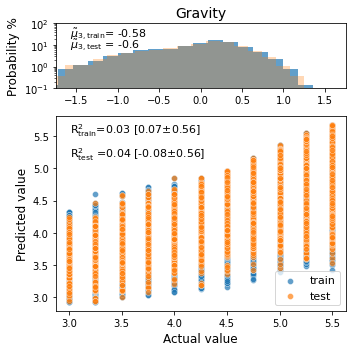

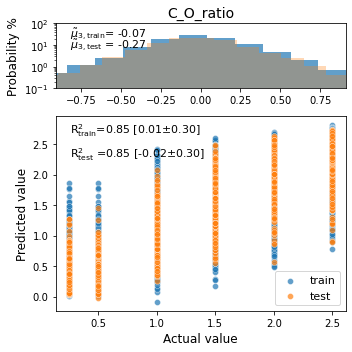

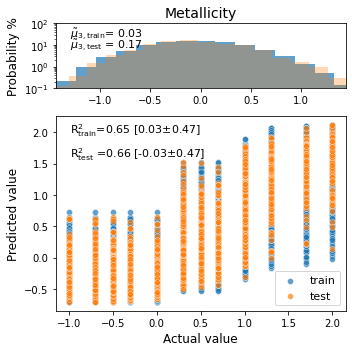

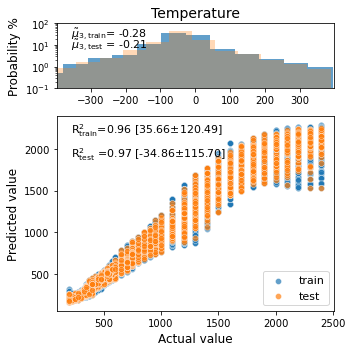

In [37]:
i = 1
regression_report(
        trained_model = train_cnn_model.trained_model,
        trained_data_processor = trained_Data_Processor,
        Xtrain = [trained_Data_Processor.X_train_standardized_rowwise[::i],
                  trained_Data_Processor.X_train_standardized_columnwise[::i]],
    
        Xtest  = [trained_Data_Processor.X_test_standardized_rowwise[::i], 
                  trained_Data_Processor.X_test_standardized_columnwise[::i]],
    
        ytrain = trained_Data_Processor.y_train_standardized_columnwise[::i],
    
        ytest  = trained_Data_Processor.y_test_standardized_columnwise[::i],
    
        target_i = 4,
        
        xy_top   = [0.05, 0.7],
        xy_bottom= [0.05, 0.85],
#         print_results = False,        
                 )